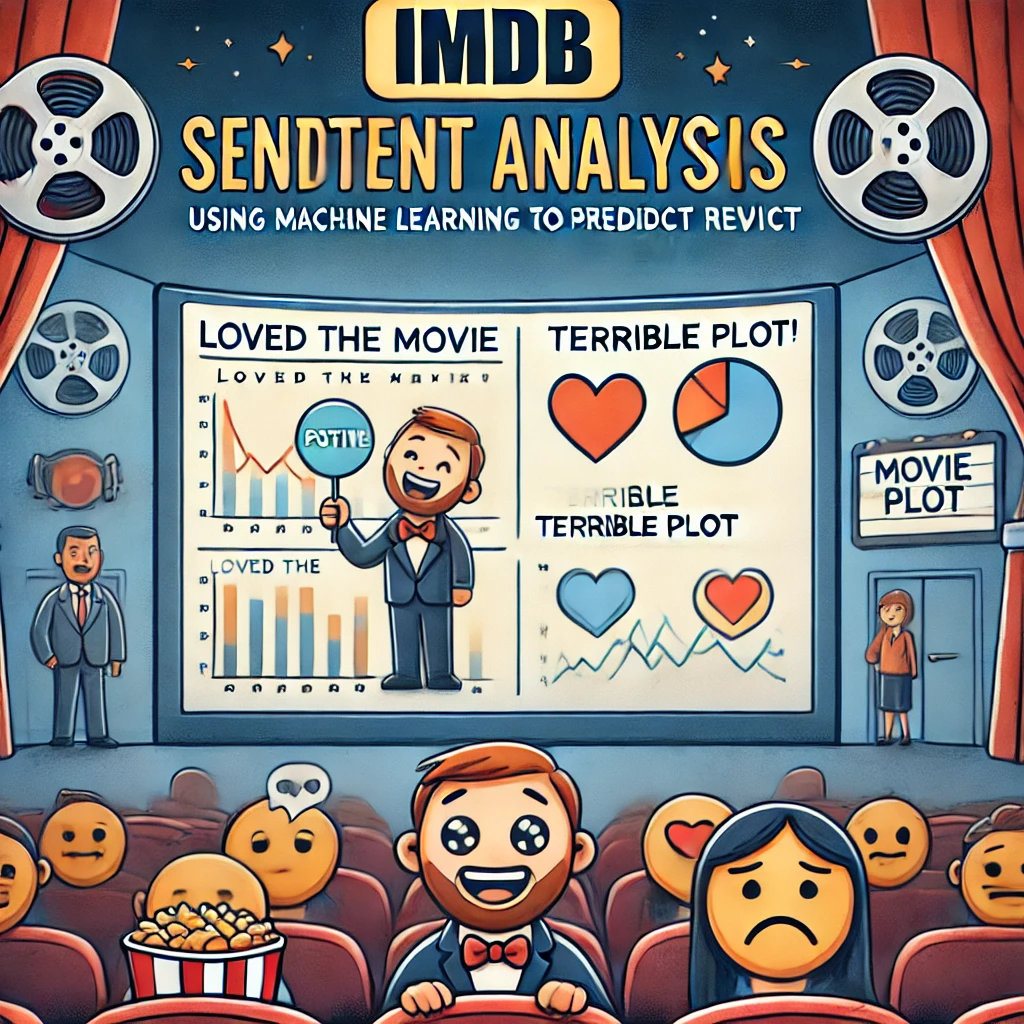

In [6]:
from IPython.display import display, HTML

html_code = '''
<div style="border: 1px solid #ccc; border-radius: 25px; padding: 30px; text-align: center; max-width: 700px; margin: auto;">
    <img src="https://lh3.googleusercontent.com/a/ACg8ocIxem2n-UsultLMtjVly082zn2NIota06-_MvResvLDg-XnbgSa=s288-c-no" alt="Profile Photo" style="border-radius: 50%; width: 100px; height: 100px; margin-bottom: 10px;">
    <h2>Muhammad Khalfan</h2>
    <p>Passionate and experienced data visualization expert skilled in Tableau, Power BI, and Python, with a strong focus on learning and executing machine learning projects.</p>
    <a href="https://www.linkedin.com/in/your-linkedin-profile" target="_blank" style="background-color: #0073b1; color: white; padding: 7px 20px; text-decoration: none; border-radius: 10px;">Visit LinkedIn Profile</a>
</div>
'''

display(HTML(html_code))


Work done by Muhammad Khalfan


1.   [LinkedIn](https://www.linkedin.com/in/muhammad-khalfan445/)

2.   [Tableau](https://public.tableau.com/app/profile/muhamad.khalfan/vizzes)




In [7]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'imdb-dataset-of-50k-movie-reviews:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F134715%2F320111%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240726%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240726T061811Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4b20f01bc4106b062afb6589c80de49fc787e658cfbbdf337e574201b3d46cf21bcfad8ce24d4142b05ab8b064628494bbf95d7f99c89128267271b77f636c1f53d53833e19fbe360386525dd01d08092f43937f67612ee19ca756cec7f10fd1835b67fa5d4f59b952e3e5bb6458d8010c81d5c69d832abb6f4b437d6101390a55dafaff07adccde5b42c9a4190e2b3eecbe10745c1368717f5543ea771dd3a48e4c017adf6e8e1f5c729ca7a6af3bcdac0da798f743244a3ab089d126e9c57d5fcbcb35f29afa979f2d7daef9a0df22c3fac9178325c08197590268b54af75ad1ac369f7801f827d56e57dd333f9c0e3813b0ce310d599b11dcd18c169ee912'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 26962657 bytes downloaded
Downloaded and uncompressed: imdb-dataset-of-50k-movie-reviews
Data source import complete.


If you wanna run in google colab, Run the above code and the remaing code will work

## Steps

* Data Collection: Loaded the dataset containing movie reviews.
* Data Preprocessing: Cleaned the text data by removing HTML tags, punctuation, and converting to lowercase.
* Exploratory Data Analysis (EDA): Analyzed the distribution of sentiments.
* Text Vectorization: Converted the cleaned text into numerical representations using TF-IDF.
* Model Building: Trained a logistic regression model.
* Model Evaluation: Evaluated the model using accuracy, precision, recall, and F1 score.
* Prediction and Interpretation: Used the trained model to predict sentiments of new text data.

## Data collection

In [8]:
import pandas as pd
df=pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [9]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Preprocessing

In [10]:
df.shape

(50000, 2)

In [11]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [12]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [13]:
df.duplicated().sum()

418

In [14]:
df.drop_duplicates(inplace=True)
df.shape

(49582, 2)

In [15]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [16]:
# Download stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
# Step 1: Remove HTML Tags
def remove_html_tags(text):
    return re.sub('<.*?>', '', text)

# Step 2: Remove Punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Step 3: Convert to Lowercase
def to_lowercase(text):
    return text.lower()

# Combined Clean Text Function
def clean_text(text):
    text = remove_html_tags(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    return text

# Apply the cleaning function to the dataset
df['cleaned_review'] = df['review'].apply(clean_text)
df.head()


,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


## Explolatery Data Analysis

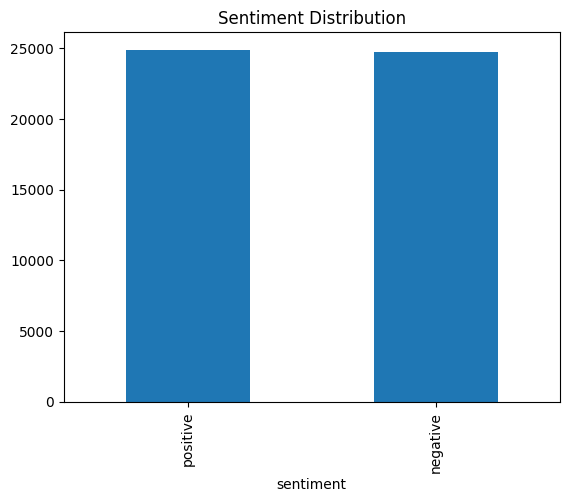

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Check the distribution of sentiments
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()

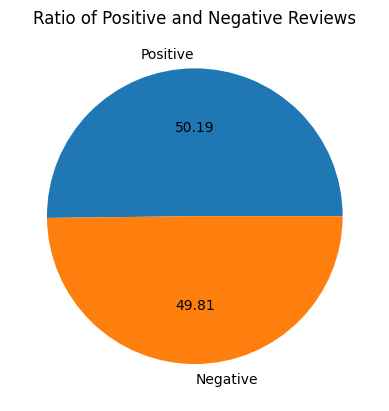

In [19]:
plt.pie(df["sentiment"].value_counts(),labels=["Positive","Negative"],autopct="%.2f")
plt.title("Ratio of Positive and Negative Reviews")
plt.show()

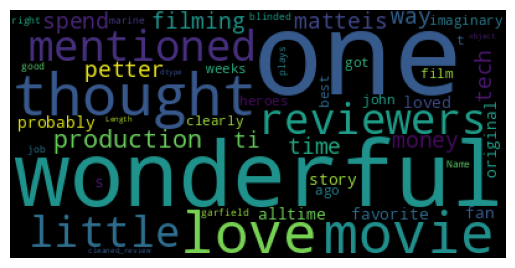

In [20]:
text=str(df[df["sentiment"]=="positive"]["cleaned_review"])

# Generate a word cloud
wordcloud = WordCloud().generate(text)

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

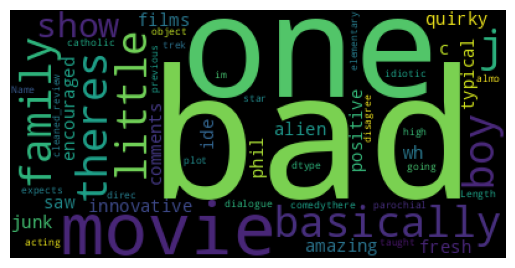

In [21]:
text=str(df[df["sentiment"]=="negative"]["cleaned_review"])

# Generate a word cloud
wordcloud = WordCloud().generate(text)

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Text Vectorization

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the data
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

## Model Building

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation

In [26]:
from sklearn.metrics import accuracy_score, classification_report

In [27]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display classification report
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)


Accuracy: 0.8874659675305032
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4939
           1       0.88      0.90      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



**Model Accuracy:** The model correctly predicts whether a review is positive or negative about 89.45% of the time. This means that out of 100 reviews, it correctly identifies the sentiment in about 89 reviews.

**Precision and Recall:**
Precision: For positive reviews, the precision is 0.89, which means that 89% of the reviews the model predicts as positive are actually positive. For negative reviews, the precision is 0.90, meaning 90% of the reviews predicted as negative are actually negative.

**Recall:** For positive reviews, the recall is 0.91, which means that the model correctly identifies 91% of all actual positive reviews. For negative reviews, the recall is 0.88, meaning the model correctly identifies 88% of all actual negative reviews.

**F1-Score:** This is a measure that combines precision and recall into a single metric. Both positive and negative reviews have an F1-score around 0.89-0.90, indicating the model's strong performance in identifying both types of sentiments.

## Prediction and Interpretation

In [28]:
# Function to clean text (simplified version)
def clean_text_simple(text):
    text = re.sub('<.*?>', '', text)  # Remove HTML tags
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

def predict_sentiment(text):
    cleaned_text = clean_text_simple(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vectorized_text)
    return 'Positive' if prediction == 1 else 'Negative'


This tests the model with multiple example reviews to inspect its predictions.

In [29]:
# Example predictions
example_reviews = [
    "I love this movie",
    "This movie was terrible",
    "What a fantastic film!",
    "I did not enjoy the movie",
    "The plot was boring and predictable",
    "An excellent movie with a great storyline",
    "I would not recommend this movie to anyone"
]

predictions = {review: predict_sentiment(review) for review in example_reviews}
predictions


{'I love this movie': 'Positive',
 'This movie was terrible': 'Negative',
 'What a fantastic film!': 'Positive',
 'I did not enjoy the movie': 'Positive',
 'The plot was boring and predictable': 'Negative',
 'An excellent movie with a great storyline': 'Positive',
 'I would not recommend this movie to anyone': 'Negative'}

This identifies the top 10 words associated with positive and negative sentiments by their TF-IDF weights and displays them.

In [30]:
# Get feature names and weights
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]

# Combine them into a DataFrame
df_tfidf_weights = pd.DataFrame({'feature': feature_names, 'weight': coefs})

# Display the top and bottom 10 features
top_10_positive = df_tfidf_weights.nlargest(10, 'weight')
top_10_negative = df_tfidf_weights.nsmallest(10, 'weight')
print("+++++++++++++++++++++++++")
print("Top 10 Positive TF-IDF Features")
print("+++++++++++++++++++++++++")
print(top_10_positive)
print("+++++++++++++++++++++++++")
print("Top 10 Negative TF-IDF Features")
print("+++++++++++++++++++++++++")
print(top_10_negative)

+++++++++++++++++++++++++
Top 10 Positive TF-IDF Features
+++++++++++++++++++++++++
        feature    weight
1954      great  7.596454
1554  excellent  7.184186
3216    perfect  5.296194
472        best  5.188754
217     amazing  5.061378
4927  wonderful  4.891423
2655      loved  4.831968
59          710  4.460681
585   brilliant  4.374268
1487    enjoyed  4.104445
+++++++++++++++++++++++++
Top 10 Negative TF-IDF Features
+++++++++++++++++++++++++
       feature     weight
4951     worst -10.788095
387        bad  -8.246109
4808     waste  -7.670586
378      awful  -7.567939
546     boring  -6.958702
4400  terrible  -6.203435
3317      poor  -6.064705
3034   nothing  -5.607137
1385      dull  -5.466468
4950     worse  -5.156784


What is TF-IDF?
TF-IDF stands for Term Frequency-Inverse Document Frequency. It’s a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus).